# Multilingual Embeddings

## supervised

Paper 2013: [Multilingual Distributed Representations without Word Alignment](https://arxiv.org/pdf/1312.6173.pdf)

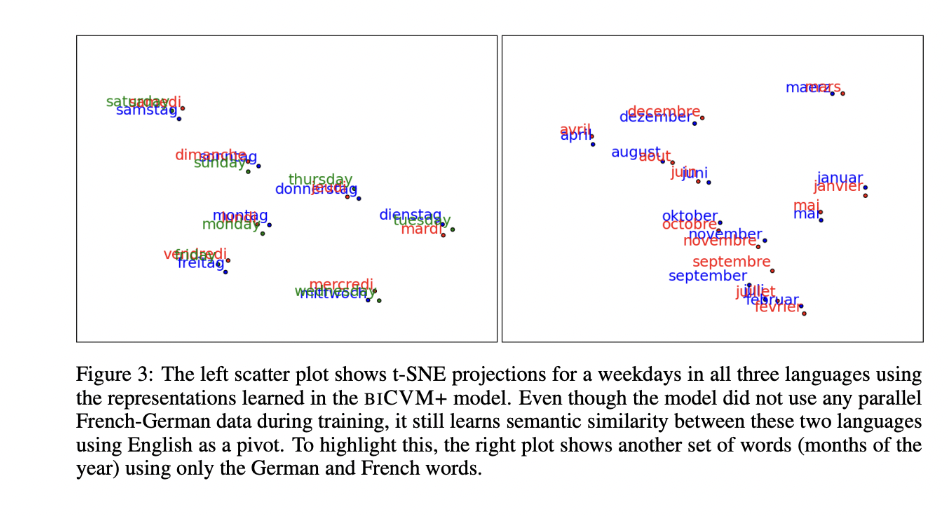

Algorithm:

1. Train distributed word representations for each language independently, such that the representations are in a shared space.

2. For each parallel sentence pair (a, b) in the training corpus:

    a. Transform the sentences a and b into fixed-size distributed representations using the CVM composition function.

    b. Compute the distance between the representations of a and b in the shared space.

3. Optimize the model parameters to minimize the objective function

Objective function: minimize distance between parallel sentence pair embeddings and maximize distance between non-parallel sentence pair embeddings. 

$$
J(\theta^{bi}) = \sum_{(a, b) \in \mathcal{C}_{A, B}} \sum_{i=1}^k E_{noise}(a, b, n_i) + \frac{\lambda}{2} ||\theta^{b_i}||^2
$$

Notations:

- $\theta^{bi}$: Model parameters for the bilingual compositional model.

- $\mathcal{C}_{A, B}$: Parallel corpus containing sentence pairs $(a, b)$ from language A and B.

- $\lambda$: Regularization parameter.

- $E_{noise}$: disagreement between sentence pair representations. comparable to loss function of a large margin nearest neighbour classifier
    
    $E_{dist}(a, n)$ is a form of contrastive estimation penalizing small distances between non-parallel sentence pairs.

    negative sampling: For every pair of parallel sentences (a, b), we sample $k$ additional sentences $n \in \mathcal{C}_B$ of high probability not exact translations of a. This is loss function of a 

    $$
    E_{noise}(a, b, n)= [1 + E_{dist}(a, b) − E_{dist}(a, n)]_+\\[1em]
    E_{dist}(a, b)=||a_{root}-b_{root}||^2
    $$

    $a_{root}, b_{root}$ are sentence embedding of sentence a and b




**BiCVM model Architecture**:

Input: Parallel sentence pairs (a, b) from the source and target languages.

Embedding Layer: transforming the input words from source and target languages into their corresponding word embeddings. These embeddings are learned for each language independently but in a shared space, allowing for cross-lingual alignment.

Composition Function (CVM): generate a fixed-size sentence embedding by combining word embeddings within a sentence. can be any function, e.g., simple operations (averaging or summing up the word embeddings), or more complex functions like neural networks.

Output: A fixed-size distributed representation for each sentence pair, which should be close in the shared space for parallel sentences.

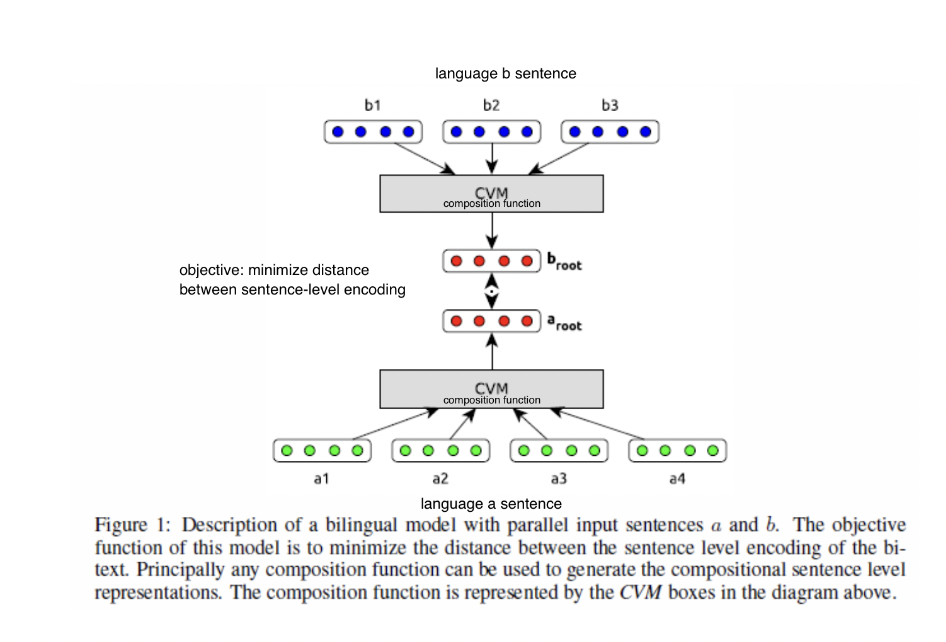

## unsupervised: MUSE

<img src='https://engineering.fb.com/wp-content/uploads/2018/01/GJ_9lgFMnVaR0ZYAAAAAAABV9MkQbj0JAAAC.gif' />

Paper 2017 [Word Translation Without Parallel Data](https://arxiv.org/pdf/1710.04087.pdf)

MUSE: a Python library for multilingual word embeddings

Advantage: Learning cross-lingual word embeddings **without parallel data**, using only monolingual corpora for each language, good for low-resource language

Closed form solution for mapping $W$:

$$
W^* = \arg \min_{W \in O_d(R)} || W X - Y ||_F = U V^T, \text{with} \  U \Sigma V^T = \text{SVD}(Y X^T)
$$

Notations:
- $X$: Source language word embeddings.
- $Y$: Target language word embeddings.
- $W$: Linear transformation matrix that aligns the source and target embeddings.
- $O_d(R)$: Orthogonal matrices with real entries and dimension d.
- $U$, $\Sigma$, $V^T$: Matrices obtained from the singular value decomposition (SVD) of $Y X^T$.

<img src='https://d3i71xaburhd42.cloudfront.net/69135a269b8d2536bc4f3caa03b465ceb9356192/6-FigureI-1.png' />

**GAN Architecture**

Embedding Layer: This layer is responsible for transforming the input words from the source and target languages into their corresponding word embeddings. These embeddings are learned independently for each language.

generator: a mapping function $W$ that align the source and target monolingual word embeddings in a shared space 

discriminator $D$: distinguish between source embeddings and target embeddings.

Discriminator objective:

$$
L_D(\theta_D|W) = -\frac{1}{n} \sum_{i=1}^n \log P_{\theta_D}(source = 1 | W x_i) - \frac{1}{m} \sum_{i=1}^m \log P_{\theta_D}(source = 0 | y_i)
$$

Mapping (generator) objective:

$$
L_W(W|\theta_D) = -\frac{1}{n} \sum_{i=1}^n \log P_{\theta_D}(source = 0 | W x_i) - \frac{1}{m} \sum_{i=1}^m \log P_{\theta_D}(source = 1 | y_i)
$$

$L_D$: Discriminator loss, $L_W$: Mapping (generator) loss

$\theta_D$: Discriminator parameters

$W$: generator parameters (Linear transformation matrix mapping from source embeddings to target embeddings)

$n$: Number of source language word embeddings

$m$: Number of target language word embeddings

$x_i$: Source language word embedding at index $i$

$y_i$: Target language word embedding at index $i$

$P_{\theta_D}(source = 1 | W x_i)$: Probability that the transformed source word embedding $Wx_i$ comes from the source language, according to the discriminator

$P_{\theta_D}(source = 0 | y_i)$: Probability that the target word embedding $y_i$ comes from the source language, according to the discriminator

$P_{\theta_D}(source = 0 | W x_i)$: Probability that the transformed source word embedding $Wx_i$ comes from the target language, according to the discriminator

$P_{\theta_D}(source = 1 | y_i)$: Probability that the target word embedding $y_i$ comes from the target language, according to the discriminator

**Algorithm**

1. adversarial learning: mapping function learns to align the source language embeddings with the target language embeddings, while the discriminator learns to differentiate between the two embeddings.

2. Procrustes Refinement: After adversarial learning, the initial mapping W is refined using the Procrustes method. The method uses frequent words aligned by the adversarial step as anchor points and minimizes an energy function corresponding to a spring system between anchor points. The refined mapping is then used to map all words in the dictionary.

3. Cross-Domain Similarity Local Scaling (CSLS): a new metric to improve performance over less frequent words, leading to spread of those points in dense regions, reduce the influence of "hubs" in the embedding space.